In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import csv
from scipy.stats import norm
from scipy import stats
import matplotlib.mlab as mlab

In [2]:
qcd = pd.read_csv('qcd_outputDataForLearning.csv')
hh = pd.read_csv('dihiggs_outputDataForLearning.csv')

In [3]:
print(len(qcd), "rows of qcd data")
qcd.head()

1703 rows of qcd data


,hh_mass,h1_mass,h2_mass,hh_pt,h1_pt,h2_pt,"deltaR(h1, h2)",deltaR(h1 jets),deltaR(h2 jets),deltaPhi(h1 jets),...,jet3_pz,jet4_pz,jet1_energy,jet2_energy,jet3_energy,jet4_energy,jet1_btag,jet2_btag,jet3_btag,jet4_btag
0,389.560210,124.325608,111.570920,136.932891,171.988626,109.203811,2.559584,2.308070,1.890789,2.144129,...,2.297561,-76.250394,220.464571,21.970768,88.955955,83.794049,1,1,1,1
1,647.207817,44.270179,50.027954,20.930002,157.928581,140.624963,4.146202,0.535946,0.671977,-0.502355,...,-93.650177,-108.175850,265.363449,158.046447,132.001760,119.019995,1,1,1,1
2,322.208428,26.864315,97.050753,38.709715,135.583186,144.740330,2.925384,0.500025,1.247225,0.452056,...,53.848765,-42.742465,137.378936,28.336301,93.615332,81.004145,1,1,1,1
3,419.258968,52.990523,68.470152,41.059689,164.301699,125.246712,3.489830,0.856370,1.418455,0.779506,...,-57.489281,7.752531,293.246702,35.669705,129.070096,22.087586,1,1,1,1
4,500.859412,50.131320,102.613244,26.595028,185.256231,187.008176,3.293268,0.639606,1.084399,0.450668,...,-66.474735,26.027230,359.636926,109.941192,149.078860,68.032946,1,1,1,1


In [4]:
print(len(hh), "rows of dihiggs data")
hh.head()
#list(hh)

4603 rows of dihiggs data


,hh_mass,h1_mass,h2_mass,hh_pt,h1_pt,h2_pt,"deltaR(h1, h2)",deltaR(h1 jets),deltaR(h2 jets),deltaPhi(h1 jets),...,jet3_pz,jet4_pz,jet1_energy,jet2_energy,jet3_energy,jet4_energy,jet1_btag,jet2_btag,jet3_btag,jet4_btag
0,357.863363,148.291836,158.296646,159.989384,146.375635,44.305395,2.173180,2.399412,3.045172,2.261379,...,-68.743157,-193.100557,213.758220,33.357314,109.728774,199.436112,1,1,1,1
1,398.807335,96.553640,58.554601,79.057467,159.554932,127.973055,3.027527,1.343736,1.118390,1.200608,...,159.218959,26.364061,145.013069,49.268918,196.843044,36.066384,1,1,1,1
2,517.175766,110.271880,130.164227,345.167743,311.858661,195.516589,1.993485,0.697377,1.152385,-0.644060,...,119.529521,120.680121,236.958103,93.822710,169.676742,166.284766,1,1,1,1
3,703.807212,179.640526,166.136193,218.966737,339.262375,272.492484,2.518050,2.053376,2.090557,-1.872111,...,-240.496539,-109.657444,927.030920,36.379140,362.014352,111.759012,1,1,1,1
4,258.159408,36.588619,25.013392,95.051098,138.921709,46.393858,3.514808,0.549648,0.997364,-0.448700,...,-129.592083,-71.691360,109.019537,36.042242,133.506407,74.563495,1,1,1,1


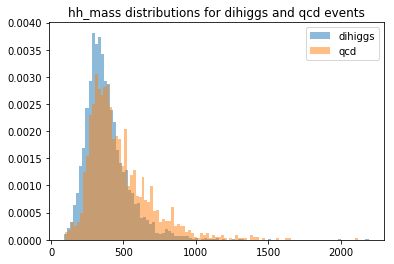

In [16]:
##############################################################
##                 NORMED HH MASS PER EVENT                 ##
##############################################################
plt.hist(hh.hh_mass, label="dihiggs", alpha=0.5, density=True, bins=100)
plt.hist(qcd.hh_mass, label="qcd", alpha=0.5, normed=True, bins=100)
plt.title("hh_mass distributions for dihiggs and qcd events")
plt.legend()

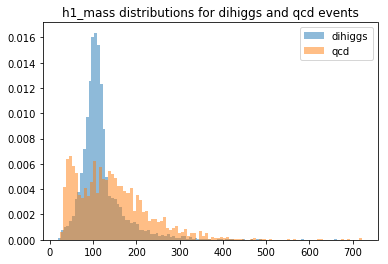

In [6]:
##############################################################
##                NORMED H_1 MASS PER EVENT                 ##
##############################################################
plt.hist(hh.h1_mass, label="dihiggs", alpha=0.5, normed=True, bins=100)
plt.hist(qcd.h1_mass, label="qcd", alpha=0.5, normed=True, bins=100)
plt.title("h1_mass distributions for dihiggs and qcd events")
plt.legend()

/Users/annacuddeback/LHCResearch/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Users/annacuddeback/LHCResearch/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


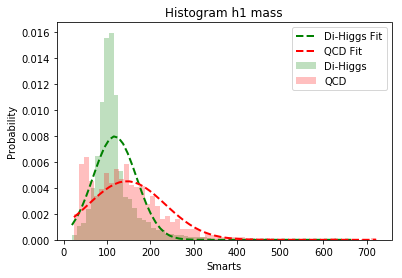

In [9]:
# best fit of data
(mu_hh, sigma_hh) = norm.fit(hh.h1_mass)

# the histogram of the data
n_hh, bins_hh, patches = plt.hist(hh.h1_mass, 60, normed=1, facecolor='green', alpha=0.25, label="Di-Higgs")

# add a 'best fit' line
y = mlab.normpdf( bins_hh, mu_hh, sigma_hh)
l = plt.plot(bins_hh, y, 'g--', linewidth=2, label="Di-Higgs Fit")

# best fit of data
(mu_qcd, sigma_qcd) = norm.fit(qcd.h1_mass)

# the histogram of the data
n_qcd, bins_qcd, patches = plt.hist(qcd.h1_mass, 60, normed=1, facecolor='red', alpha=0.25, label="QCD")

# add a 'best fit' line
y = mlab.normpdf( bins_qcd, mu_qcd, sigma_qcd)
l = plt.plot(bins_qcd, y, 'r--', linewidth=2, label="QCD Fit")

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("Histogram h1 mass")
plt.grid(False)

plt.legend()
plt.show()

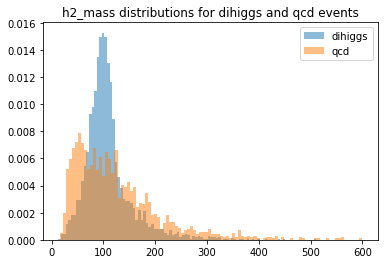

In [10]:
##############################################################
##                NORMED H_2 MASS PER EVENT                 ##
##############################################################
plt.hist(hh.h2_mass, label="dihiggs", alpha=0.5, normed=True, bins=100)
plt.hist(qcd.h2_mass, label="qcd", alpha=0.5, normed=True, bins=100)
plt.title("h2_mass distributions for dihiggs and qcd events")
plt.legend()
plt.show()

/Users/annacuddeback/LHCResearch/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Users/annacuddeback/LHCResearch/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


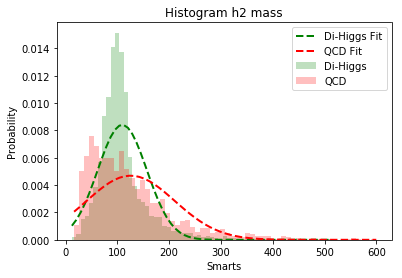

In [11]:
# best fit of data
(mu_hh, sigma_hh) = norm.fit(hh.h2_mass)

# the histogram of the data
n_hh, bins_hh, patches = plt.hist(hh.h2_mass, 60, normed=1, facecolor='green', alpha=0.25, label="Di-Higgs")

# add a 'best fit' line
y = mlab.normpdf( bins_hh, mu_hh, sigma_hh)
l = plt.plot(bins_hh, y, 'g--', linewidth=2, label="Di-Higgs Fit")

# best fit of data
(mu_qcd, sigma_qcd) = norm.fit(qcd.h2_mass)

# the histogram of the data
n_qcd, bins_qcd, patches = plt.hist(qcd.h2_mass, 60, normed=1, facecolor='red', alpha=0.25, label="QCD")

# add a 'best fit' line
y = mlab.normpdf( bins_qcd, mu_qcd, sigma_qcd)
l = plt.plot(bins_qcd, y, 'r--', linewidth=2, label="QCD Fit")

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("Histogram h2 mass")
plt.grid(False)

plt.legend()
plt.show()


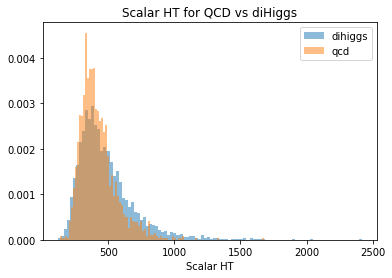

In [12]:
##############################################################
##                  NORMED SCALAR HT                        ##
##############################################################
plt.hist(hh.scalarHT, label="dihiggs", alpha=0.5, normed=True, bins=100)
plt.hist(qcd.scalarHT, label="qcd", alpha=0.5, normed=True, bins=100)
plt.title("Scalar HT for QCD vs diHiggs")
plt.xlabel("Scalar HT")
plt.legend()

hh avg jet energy: 560.9 for 18412 jets || qcd avg jet energy: 619.4 for 6812 jets


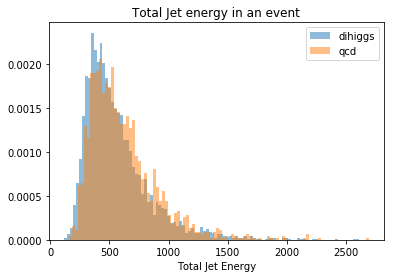

In [13]:
##############################################################
##                 JET ENERGY PER EVENT                     ##
##############################################################
hhE = hh.jet1_energy + hh.jet2_energy + hh.jet3_energy +hh.jet4_energy
qcdE = qcd.jet1_energy + qcd.jet2_energy + qcd.jet3_energy + qcd.jet4_energy
plt.hist(hhE, alpha=0.5, label="dihiggs", normed=True, bins=100)
plt.hist(qcdE, alpha=0.5, label="qcd", normed=True, bins=100)
plt.title("Total Jet energy in an event")
plt.legend()
plt.xlabel("Total Jet Energy")
print("hh avg jet energy:", round((sum(hhE)/len(hhE)),1), "for", len(hhE)*4, "jets", "||", "qcd avg jet energy:", round((sum(qcdE)/len(qcdE)),1), "for", len(qcdE)*4, "jets")

Text(0.5, 1.0, 'Number of jets in an event')

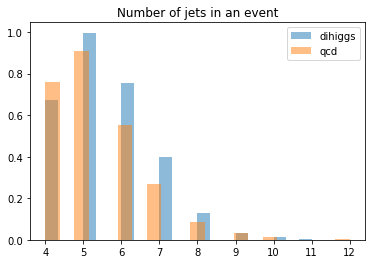

In [14]:
##############################################################
##                     N JETS PER EVENT                     ##
##############################################################
plt.hist(hh.nJets, alpha=0.5, label="dihiggs", bins=21, normed=True)
plt.hist(qcd.nJets, alpha=0.5, label="qcd", bins=21, normed=True)
plt.legend()
plt.title("Number of jets in an event")

Text(0.5, 1.0, 'Number of b tags in an event')

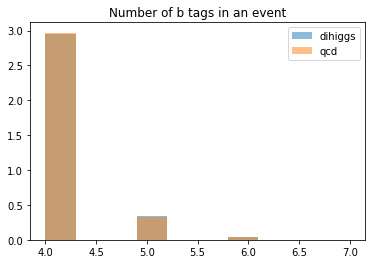

In [15]:
##############################################################
##                     B TAGS PER EVENT                     ##
##############################################################
plt.hist(hh.nBTags, alpha=0.5, label="dihiggs", bins=10, normed=True)
plt.hist(qcd.nBTags, alpha=0.5, label="qcd", bins=10, normed=True)
plt.legend()
plt.title("Number of b tags in an event")